#Código Exemplo

Estes são códigos básicos para o estudo do IBM Quantum Experience e do Qiskit. Os códigos foram inspirados de um minicurso 
do programa de verão do LNCC, dado por Renato Portugal. 

In [9]:
#executar apenas da primeira vez
#digite seu token entre os parenteses
from qiskit import *
from qiskit import IBMQ
#IBMQ.save_account('token') 

configrc.store_credentials:WARNING:2021-02-18 14:20:56,764: Credentials already present. Set overwrite=True to overwrite.


In [10]:
from qiskit import *
from qiskit import IBMQ
provedor = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-02-18 14:22:01,437: Credentials are already in use. The existing account in the session will be replaced.


In [18]:
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [15]:
#vamos a seguir recriar o circuito para os estados de bell 
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
#exibimos aqui o cicuito criado, igual feito no composer
print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [16]:
#listaremos então as máquinas disponíveis 
provedor.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [17]:
### O comando get_backend seleciona o backend
### O comando execute executa o circuito no IBMQX2
### O job entra na fila. A espera pode demorar MUITAS HORAS.
### O comando job_monitor mostra a posição em tempo real.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina = provedor.get_backend('ibmq_lima')
job2 = execute(circuit, maquina, shots=1024)
job_monitor(job2)
resultado2 = job2.result()
contagem2 = resultado2.get_counts()
print(contagem)

Job Status: job has successfully run
{'00': 543, '01': 17, '10': 18, '11': 446}


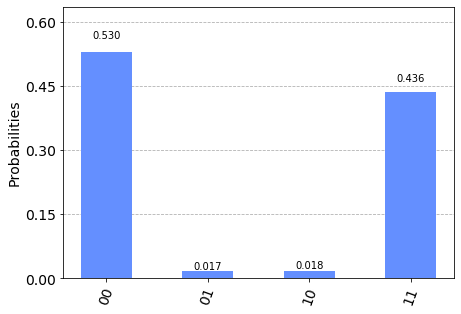

In [19]:
plot_histogram(contagem)

In [20]:
#executando agora no simulador qasm
simulador = BasicAer.get_backend('qasm_simulator')
job1 = execute(circuit, simulador, shots=8024)
resultado1 = job1.result()
contagem1 = resultado1.get_counts()
print(contagem1)

{'11': 4029, '00': 3995}


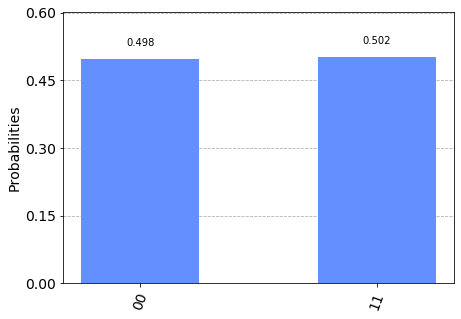

In [21]:
plot_histogram(contagem1)